     Company  Year  Revenue ($M)  Net Income ($M)  Total Assets ($M)  \
0  Microsoft  2023        211915            72361             411976   
1  Microsoft  2022        198270            72738             364840   
2  Microsoft  2021        168088            61271             333779   
3      Tesla  2023         96773            14974             106618   
4      Tesla  2022         81462            12587              82338   
5      Tesla  2021         53823             5644              62131   
6      Apple  2023        383285            96995             352583   
7      Apple  2022        394328            99803             352755   
8      Apple  2021        365817            94680             351002   

   Total Liabilities ($M)  Shareholders' Equity ($M)  EPS ($)  Revenue Growth  \
0                  205753                     206223     9.68        0.000000   
1                  198298                     166542     9.65       -6.438902   
2                  191791           

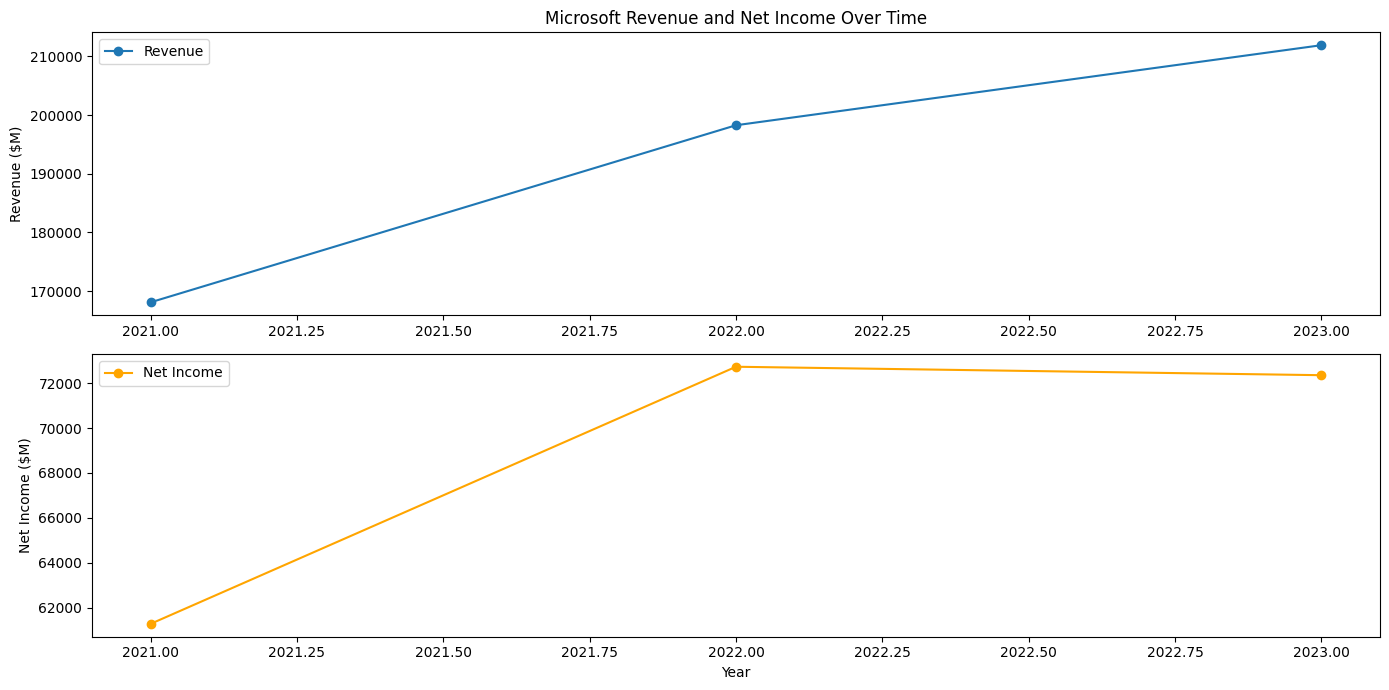

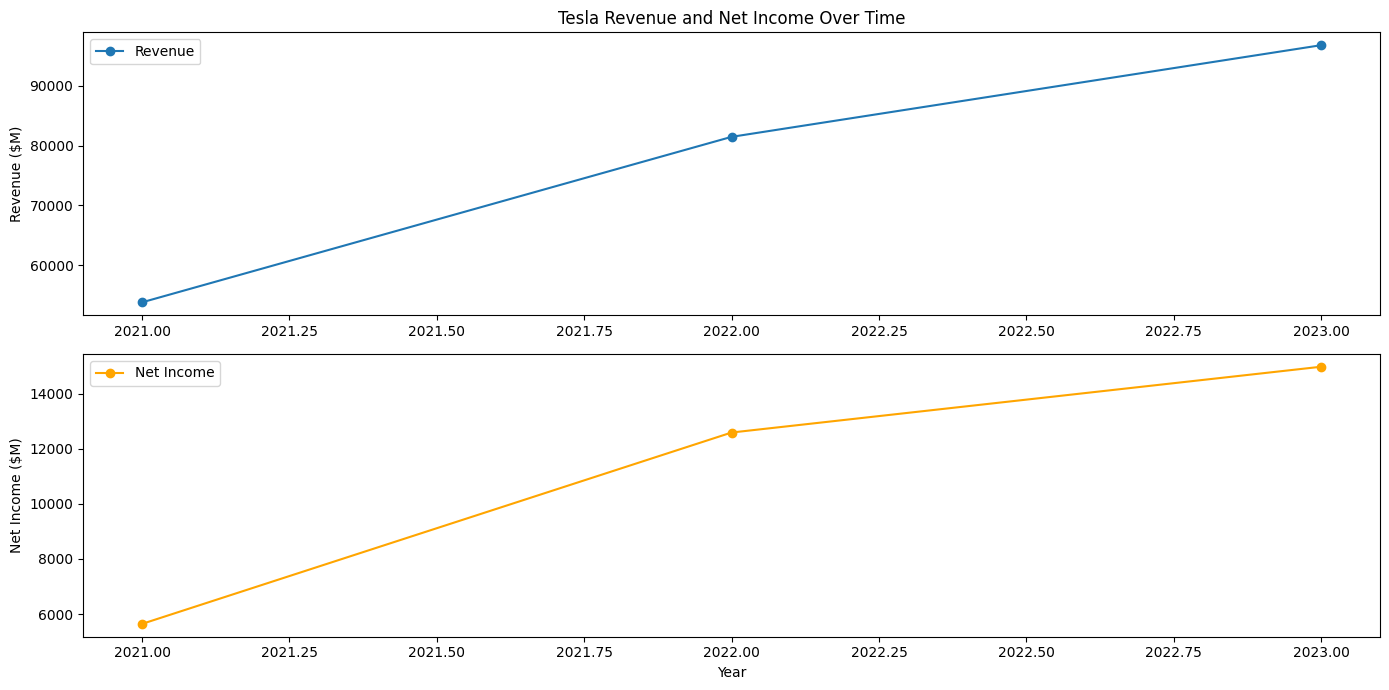

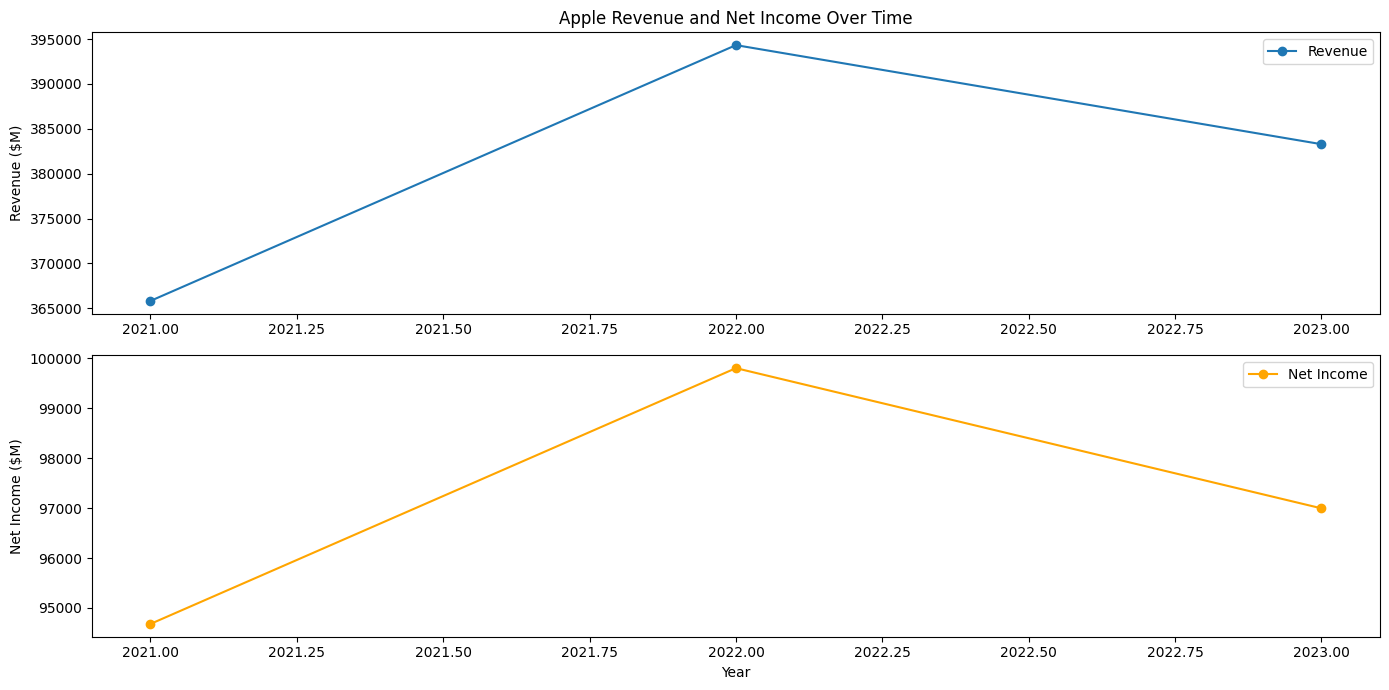

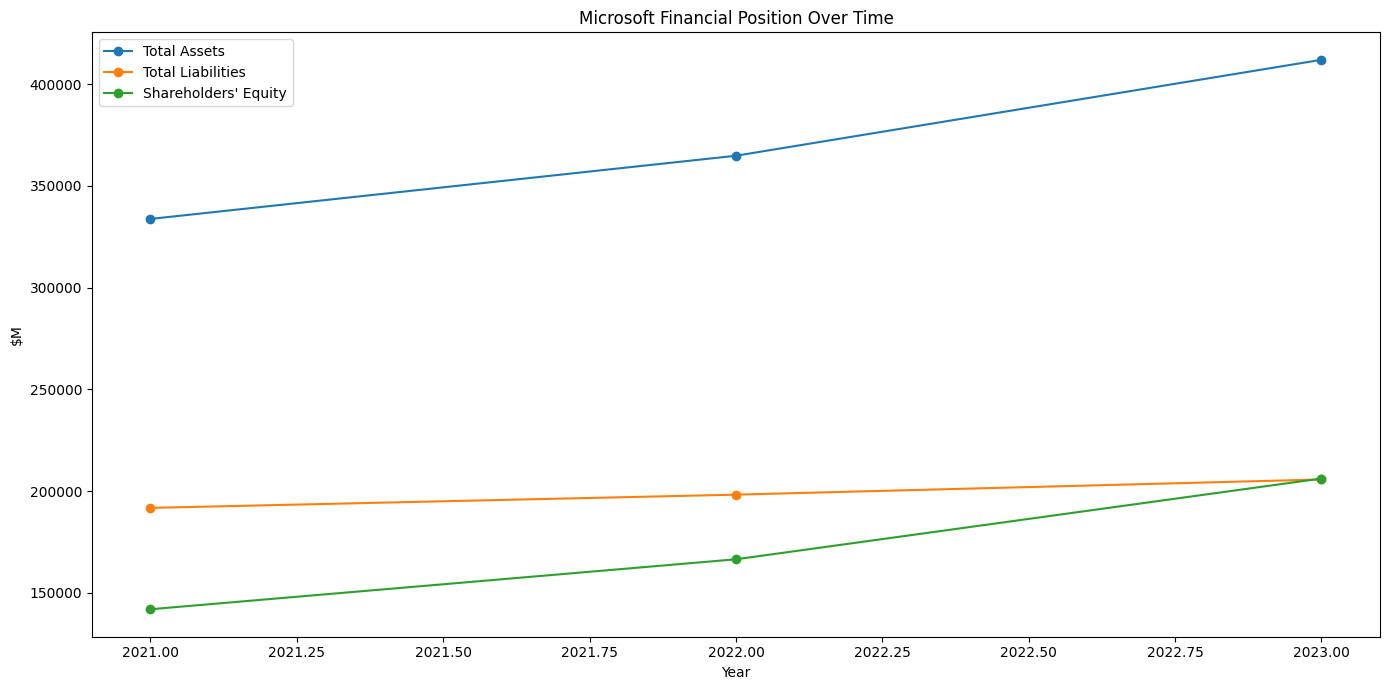

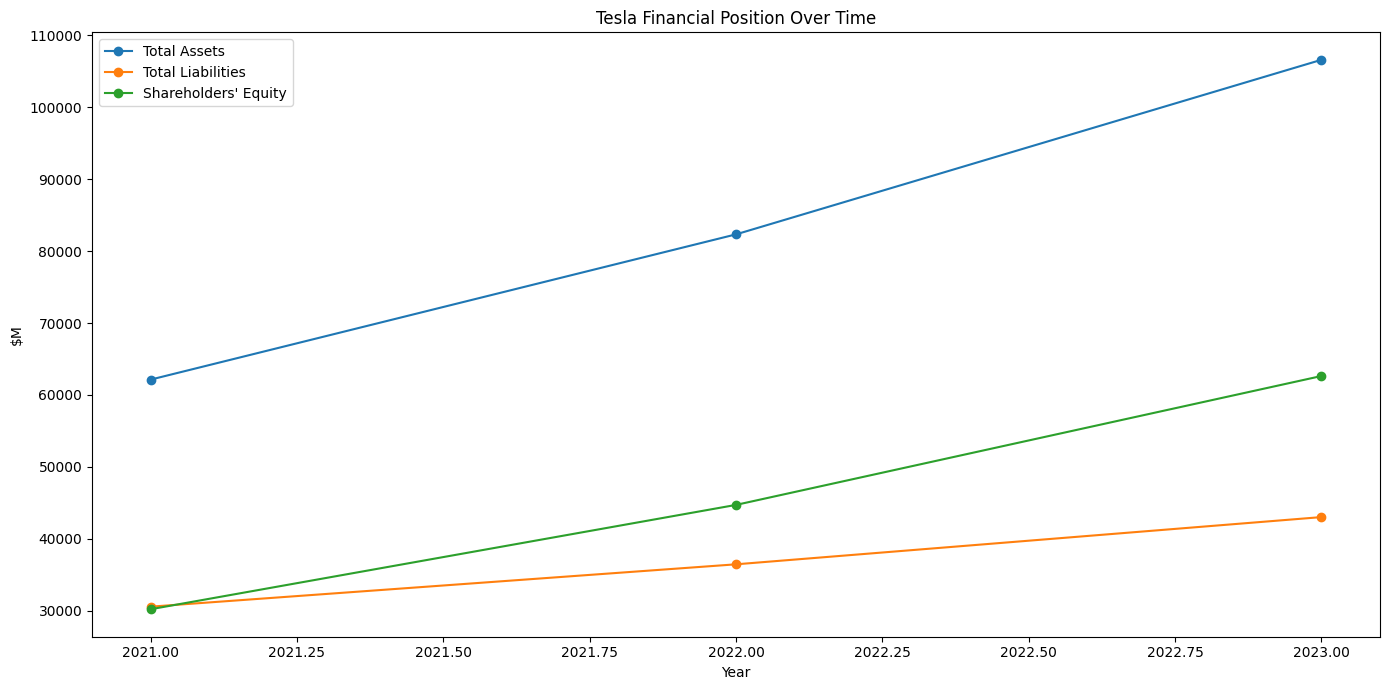

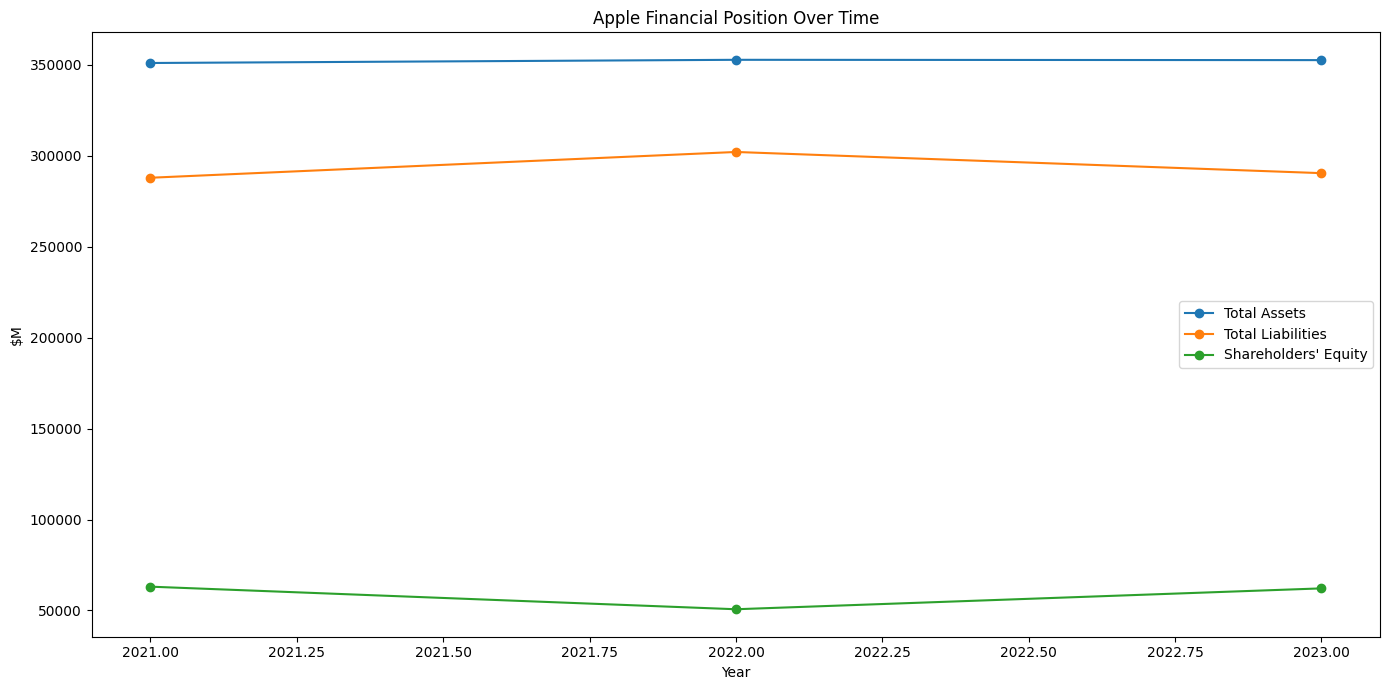

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('/content/financial_data.xlsx')

# Calculate growth rates
data['Revenue Growth'] = data.groupby('Company')['Revenue ($M)'].pct_change() * 100
data['Net Income Growth'] = data.groupby('Company')['Net Income ($M)'].pct_change() * 100

# Fill NA values that result from pct_change calculations with 0 or an appropriate value
data.fillna(0, inplace=True)

# Display the dataframe to verify the calculations
print(data)

# Optionally, you could summarize these findings for each company
summary = data.groupby('Company').agg({
    'Revenue Growth': 'mean',
    'Net Income Growth': 'mean'
}).reset_index()

print("\nYear-over-Year Average Growth Rates (%):")
print(summary)

# Plot revenue and net income trends
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    plt.figure(figsize=(14, 7))

    plt.subplot(2, 1, 1)
    plt.plot(company_data['Year'], company_data['Revenue ($M)'], marker='o', label='Revenue')
    plt.title(f'{company} Revenue and Net Income Over Time')
    plt.ylabel('Revenue ($M)')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(company_data['Year'], company_data['Net Income ($M)'], marker='o', color='orange', label='Net Income')
    plt.xlabel('Year')
    plt.ylabel('Net Income ($M)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Analyze assets, liabilities, and equity trends
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    plt.figure(figsize=(14, 7))

    plt.plot(company_data['Year'], company_data['Total Assets ($M)'], marker='o', label='Total Assets')
    plt.plot(company_data['Year'], company_data['Total Liabilities ($M)'], marker='o', label='Total Liabilities')
    plt.plot(company_data['Year'], company_data['Shareholders\' Equity ($M)'], marker='o', label='Shareholders\' Equity')
    plt.title(f'{company} Financial Position Over Time')
    plt.xlabel('Year')
    plt.ylabel('$M')
    plt.legend()

    plt.tight_layout()
    plt.show()
